In [11]:
library(tidyverse)

source('../utils/plottingUtilities.R')

In [12]:
# original images 
x <- read.csv('../data/clean_x_2020.csv')[, -1]

# Load instabilities

In [14]:
results_dir <- '../model_fits/nmf_fits/staNMFDicts_2020/'

In [15]:
k1 <- 3 # smallest number for K
k2 <- 30 # largest number for K

In [16]:
stabilities <- c()
for(k in k1:k2){
    stability_file_k <- paste0(results_dir, 'K=', k, '/instability.csv')
    stabilities <- rbind(stabilities, 
                         read.csv(stability_file_k, sep = ',', header = FALSE))
}

colnames(stabilities) <- c('n_pp', 'instability')

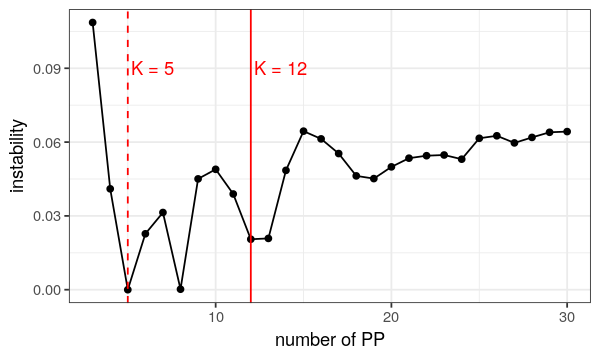

In [17]:
# plot instabilities as a function of K
options(repr.plot.width = 5, repr.plot.height = 3)
stabilities %>% 
    ggplot() + geom_point(aes(x = n_pp, y = instability)) + 
                geom_line(aes(x = n_pp, y = instability)) + 
        xlab('number of PP') + theme_bw() + 
        geom_vline(xintercept = 5, color = 'red', linetype = 'dashed') + 
            annotate("text", x=6.4, y=0.09, label= "K = 5", color = 'red') +
        geom_vline(xintercept = 12, color = 'red', linetype = 'solid') + 
            annotate("text", x=13.7, y=0.09, label= "K = 12", color = 'red') 
#         geom_vline(xintercept = 19, color = 'blue', linetype = 'dashed') + 
#             annotate("text", x=20.7, y=0.09, label= "K = 19", color = 'blue') 


# check out error in fit 

Here, we plot the l2 error in the fit as a function of the number of principal patterns

In [18]:
l2_errors <- data.frame(n_pp = c(), error = c())

for(k in k1:k2){
    alpha <- read.csv(paste0(results_dir, '/K=', k, '/alpha_99.csv'))[, -1]
    dict <- read.csv(paste0(results_dir, '/K=', k, '/factorization_99.csv'), header = FALSE)[, -1]

    residual <- x - as.matrix(dict) %*% as.matrix(alpha)
    error <- sum(residual**2)
        
    l2_errors <- rbind(l2_errors, data.frame(n_pp = k, error = error))
}

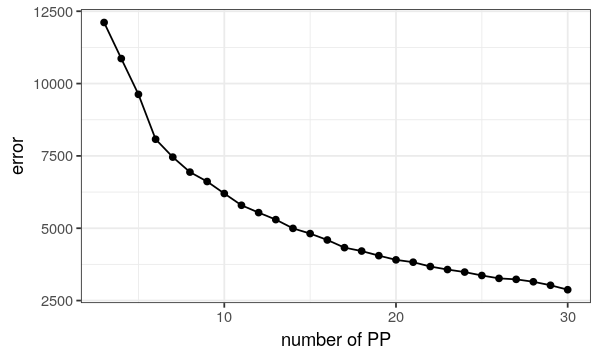

In [19]:
options(repr.plot.width = 5, repr.plot.height = 3)
l2_errors %>% 
    ggplot() + geom_point(aes(x = n_pp, y = error)) + 
                geom_line(aes(x = n_pp, y = error)) + 
        xlab('number of PP') + theme_bw()

look at individual errors

In [20]:
corr_df <- data.frame(n_pp = c(), corr = c(), gene = c())

for(k in k1:k2){
    alpha <- read.csv(paste0(results_dir, '/K=', k, '/alpha_99.csv'))[, -1]
    dict <- read.csv(paste0(results_dir, '/K=', k, '/factorization_99.csv'), header = FALSE)[, -1]

    correlation <- diag(cor(x, as.matrix(dict) %*% as.matrix(alpha)))
        
    corr_df <- rbind(corr_df, data.frame(n_pp = k, 
                                             error = as.vector(correlation), 
                                             gene = names(correlation)))
}

Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”
Warning message in c

Warning message:
“Removed 665 rows containing non-finite values (stat_boxplot).”


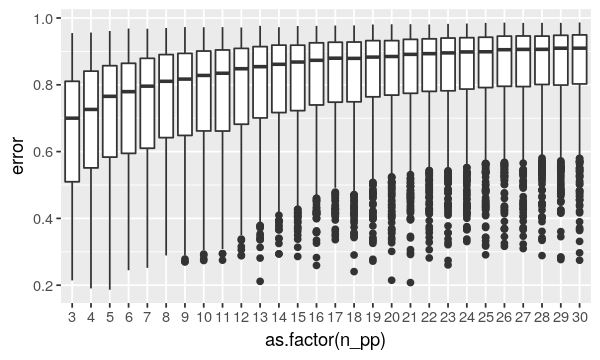

In [21]:
corr_df %>% 
    ggplot() + geom_boxplot(aes(x = as.factor(n_pp), y = error))

# Check out PPs

In [22]:
# need the template
load('../data/lateData.Rdata')

[1] 1 2 3 4 5

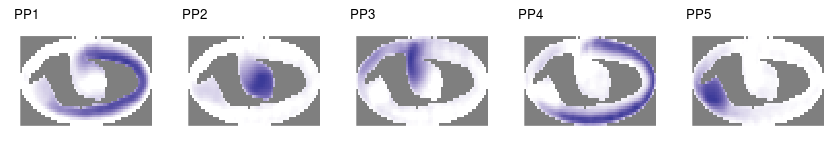

In [23]:
# choose a K
K <- 5

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 1.2)

plot_all_PPs(PPs[, -1], late$template)

[1] 1 2 3 4 5 6 7 8

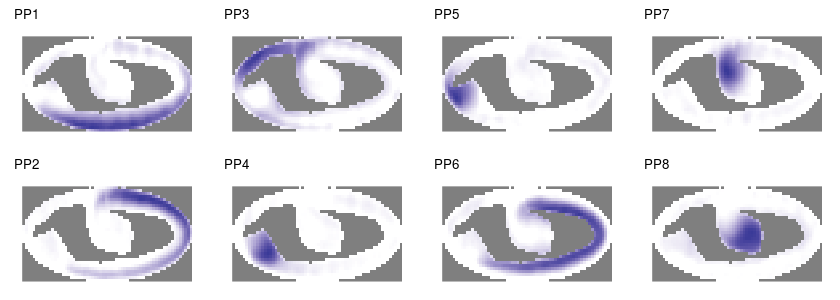

In [24]:
### choose a K
K <- 8

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5)

plot_all_PPs(PPs[, -1], late$template, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12

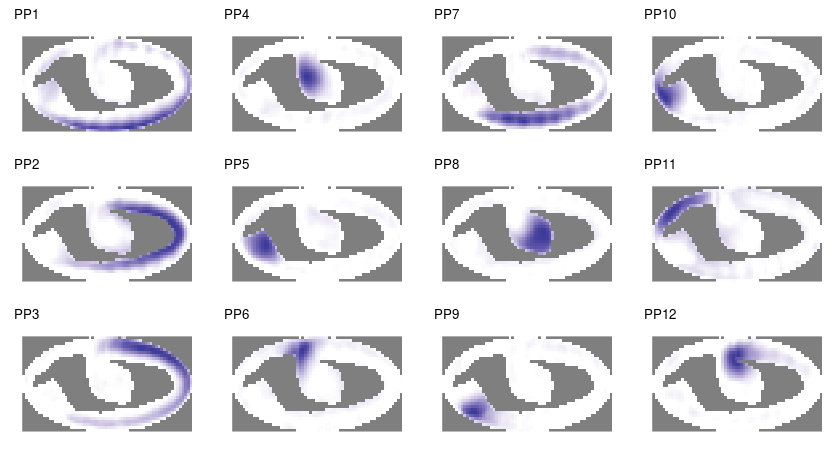

In [25]:
### choose a K
K <- 12

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5*1.5)

plot_all_PPs(PPs[, -1], late$template, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

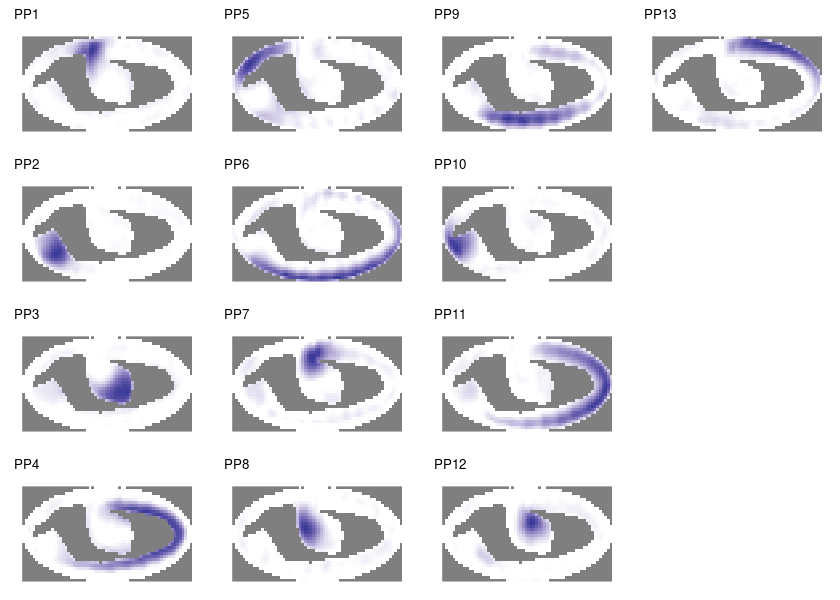

In [26]:
### choose a K
K <- 13

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$template, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

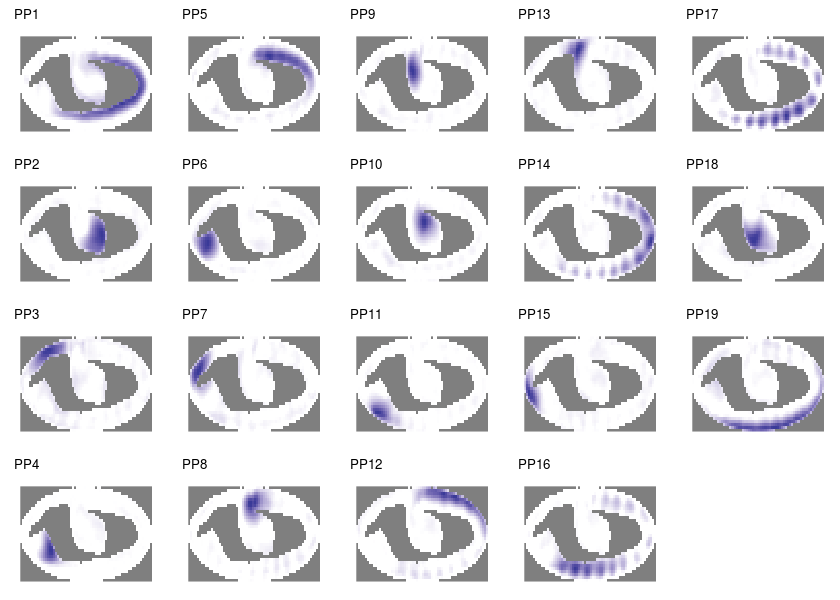

In [27]:
# choose a K
K <- 19

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$template)

# Pull gene lists

In [28]:
alpha <- read.csv(paste0(results_dir, '/K=', 12, '/alpha_99.csv'))[, -1]

In [29]:
dict <- read.csv(paste0(results_dir, '/K=', 12, '/factorization_99.csv'), header = FALSE)[, -1]

In [30]:
reconstruction <- as.matrix(dict) %*% as.matrix(alpha)

In [31]:
# normalize coefficients 
normalize_vec <- function(x){
    return(x / sum(x))
}

In [32]:
alpha_normalized <- apply(alpha, 2, normalize_vec)

In [33]:
for(i in 1:dim(alpha_normalized)[1]){
    coeffs <- alpha_normalized[i, ]
    
    coeffs <- coeffs[!is.na(coeffs)]
    coeffs <- coeffs[coeffs > 0.5]
    coeffs <- sort(coeffs, decreasing = TRUE)
    
    coeffs
    
    print(i)
    cat(paste(names(coeffs)))
    cat('\n')
    cat('\n')
}

[1] 1
gsb Ubx ac CG11456 mthl5 hb HLHm3 fd96Ca

[1] 2
bap CG12744 meso18E net.1 tin wgn twi_1 eya_2.1 l.3.82Fd_2 eya_2 Him CG5899 Mef2 retn net

[1] 3
ey ey.1 svp rho CG8654 Uev1A Sulf1.1 CG12489_2 l.3.82Fd_1 en CG6327 Trim9 unpg CG2865 CG13624_2 loner CG12909.1 SoxN CG9663 nvy Nrt slp1.2

[1] 4
fng skl skl.1 prd_3 otp_1 otp_3 noc prd_2 byn emc CG8443 otp_5 Mkp3 scat byn.1 Prx2540.2.1 CG8306 Mkp3.1 CG8960 Prx2540.2 CG10176.2 HLH54F.3 CG5295 CG8001 bnb.1 Rab23 bnb

[1] 5
Hel89B CG4322 CG3597 RhoL CG6070 toy ttk_1 Oscillin Oscillin.1 su.r..1 Pros54 ppl Dip.C CG3838_1 su.r. ham CG32423.1 CG32423 CG7966 CrebA.1 CG32423.2 vri Dp1 Keap1 gcm_2 Grp1 gcm_1 UGP gcm2 CG1234 CG6563_1 Aldh ImpE2 knrl CG9246 MESR3.1 CG6854

[1] 6
pgc CG9520 CG11275 kay Ance_2 tup_2 otp_4 otp_2 CG17390

[1] 7
nerfin.1 nerfin.1.2 Tulp Scr.2 ara CG2083 CG6398.1 Obp99a CG11755.1 Scr

[1] 8
Ptx1 Ugt36Bc.2 exex piwi CG9925 Chd64 aret CG9467 CG9232 Pdp1 Rel.1 Thor CG7224 Pdp1.1 Aplip1 CG13290 Ugt36Bc.1 sc_2 ttk_2 m2 Rapgap

# example of a reconstruction

In [34]:
ls()

[1] "alpha"            "alpha_normalized" "coeffs"           "corr_df"         
 [5] "correlation"      "dict"             "error"            "generateImage"   
 [9] "getNodeImages"    "getNodeLabel"     "getNodePosition"  "i"               
[13] "img2Color"        "k"                "K"                "k1"              
[17] "k2"               "l2_errors"        "late"             "mapLate2Early"   
[21] "multiplot"        "normalize_vec"    "overlayImage"     "overlayImages"   
[25] "plot_all_PPs"     "plotGroupImg"     "plotImg"          "plotPP"          
[29] "pp_file_k"        "PPs"              "reconstruction"   "residual"        
[33] "results_dir"      "shiftHoriz"       "shiftImg"         "shiftVert"       
[37] "stabilities"      "stability_file_k" "tf"               "x"

In [35]:
which_gene <- 'Optix'

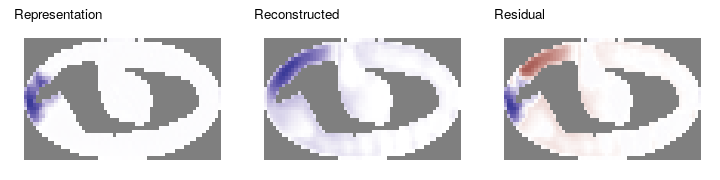

In [36]:
options(repr.plot.width = 6, repr.plot.height = 1.5)
p <- list()
p[[1]] <- plotImg(late$x[, which_gene], late$template, FALSE, 'Representation')
p[[2]] <- plotImg(reconstruction[, which_gene], late$template, FALSE, 'Reconstructed')
p[[3]] <- plotImg(late$x[, which_gene] - reconstruction[,which_gene], late$template, FALSE, 'Residual')

multiplot(plotlist = p, cols = 3)

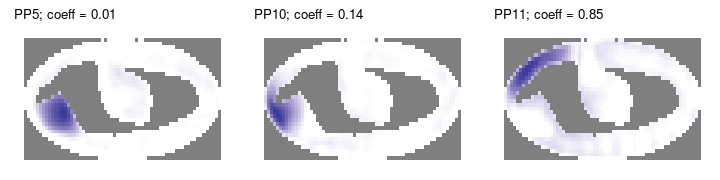

In [37]:
which_dict <- which(alpha_normalized[, which_gene] > 0)

p <- list()
for (i in 1:length(which_dict)){
    p[[i]] <- plotImg(dict[, which_dict[i]], late$template, FALSE, 
                      paste0('PP', which_dict[i], '; coeff = ', 
                             round(alpha_normalized[which_dict[i], which_gene], 2)))
}

options(repr.plot.width = 2 * length(which_dict), repr.plot.height = 1.5)
multiplot(plotlist = p, cols = length(which_dict))

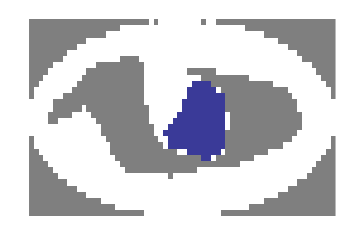

In [38]:
options(repr.plot.width = 3, repr.plot.height = 2)

plotImg(dict[, 8] > quantile(dict[, 8], 0.9), late$template, FALSE)